In [38]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

### Steps in Regression
- Dataset creation and train & test splitting
- Guess a line
- Measure how wrong is the line
- See how wrong it is.
- Correct it slightly
- Rinse and Repeat


## Making regression dataset
- Making Dataset for simple linear regression
- sample size 250. 1 Feature to train on


In [67]:
# linear regression dataset
X, y = make_regression(
    n_samples=500,
    n_features=1,
    noise=50,
    bias=5,
    random_state=14,
)
X.shape, y.shape

((500, 1), (500,))

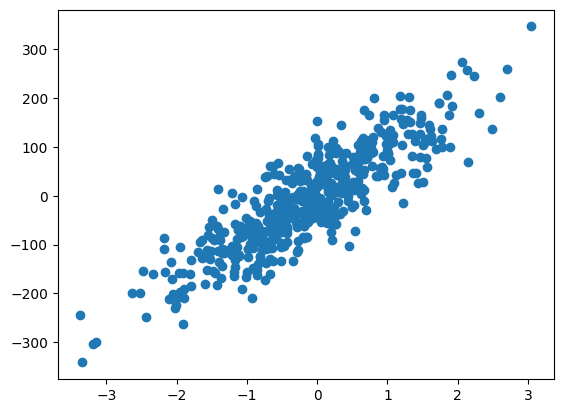

In [68]:
plt.scatter(X, y)

In [69]:
x_train, x_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=14,
    train_size=0.20,
)

------

### Using Scikit-Learn

In [70]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

model.coef_, model.intercept_

y_pred = model.predict(x_test)

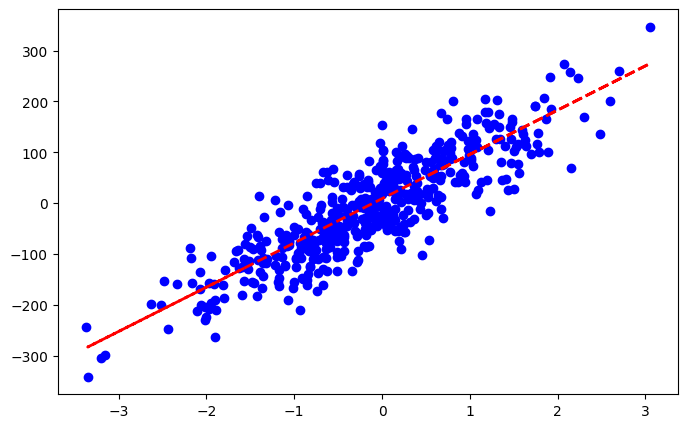

In [71]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(X, y, color="blue", label="data")
ax.plot(
    x_test,
    y_pred,
    color="red",
    label="prediction",
    linestyle="--",
    linewidth=2,
)

### Also applying standard scaler

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
y_scaled = scaler.transform(y.reshape(-1, 1))

x_scaled_train, x_scaled_test, y_scaled_train, y_scaled_test = train_test_split(
    x_scaled,
    y_scaled,
    random_state=14,
    test_size=0.20,
)



In [77]:
model2 = LinearRegression()
model2.fit(x_scaled_train, y_scaled_train)
y_pred_scaled = model2.predict(x_scaled_test)

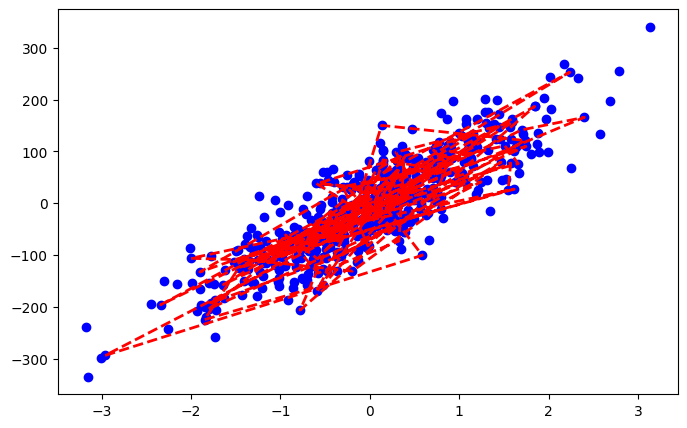

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(x_scaled, y_scaled, color="blue", label="data")
ax.plot(
    x_scaled_test,
    y_scaled_test,
    color="red",
    label="prediction",
    linestyle="--",
    linewidth=2,
)

# not able to understand why scaled data is not giving good results

-----

### Using Covariance and Variance

- Calculate Covariance
- Calculate Variance


### Covariance

Indicates the direction of the linear relationship between X and Y. Positive covariance means they move together; negative means opposite.

$$
Cov(x, y) = \frac{\sum(x_{i} - \overline{x})(y_{i} - \overline{y})}{n -1}
$$

-   $x_{i}$ x at i
-   $\overline{x}$ mean of x
-   $y_{i}$ x at i
-   $\overline{y}$ mean of x


### Variance
Measures how spread out the X values are from their mean.

$$
Var(x) = \sum(x_{i} - \overline{x})^{2}
$$

-   $x_{i}$ x at i
-   $\overline{x}$ mean of x

### Slop using Covariance and Variance
**Slope $b_{1}$**: Represents the change in $Y$ for a one-unit change in $X$. It's the ratio of their shared movement (covariance) to $X$'s own spread (variance).

**Intercept ${b_{0}}$**: The calculation for the intercept relies on a fundamental property of the Ordinary Least Squares line: it always passes exactly through the mean of the X values and the mean of the Y values $(\overline{x}, \overline{y})$.

#### Why This Works (Intuition)
1. Covariance (Numerator): Captures how much X and Y change together.
2. Variance (Denominator): Standardizes this by X's own fluctuation.
3. The Ratio: Tells you how much Y changes relative to X's changes, giving you the slope.

$$
b_{1}=\frac{\sum (x_{i}-\={x})(y_{i}-\={y})}{\sum (x_{i}-\={x})^{2}}=\frac{Cov(X,Y)}{Var(X)}
$$

In [44]:
x_mean = np.mean(X)
y_mean = np.mean(y)
n = len(X)

covariance = np.sum((X - x_mean) * np.sum(y - y_mean))
variance = np.sum((X - x_mean) ** 2)

print(covariance, variance)

-6.462348535570529e-27 282.43978046934683


In [45]:
slop = covariance / variance
intercept = y_mean - slop * x_mean
slop, intercept

(np.float64(-2.2880447381851322e-29), np.float64(-17.932721081064702))

In [46]:
y_pred = slop * x_test + intercept

In [47]:
y_pred[0]

array([-17.93272108])

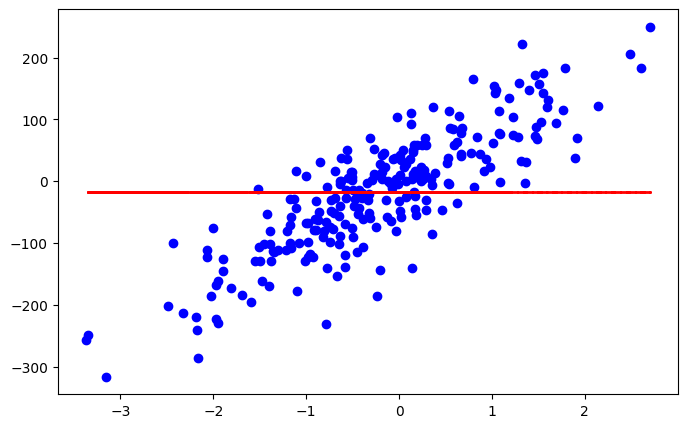

In [48]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(X, y, color="blue", label="data")
ax.plot(
    x_test,
    y_pred,
    color="red",
    label="prediction",
    linestyle="--",
    linewidth=2,
)

--------

$$\^{\beta }=(\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{y}$$

-------

### Guess Line
- Initialize random weights
- predict

In [ ]:
def init():
    m = np.random.rand()
    c = np.random.rand()
    return m, c

In [ ]:
def predict_raw(X, m, c):
    y_pred = []
    for x in X:
        y_hat = (x * m) + c
        y_pred.append(y_hat)

    return np.array(y_pred)

In [30]:
def predict(X, m, c):
    y_pred = np.dot(X, m) + c
    return y_pred

### Calculate Root Mean Square Error
- Calculate squared error for each prediction
- mean and then square root

In [ ]:
def root_mean_squared_error_raw(y_pred, y):
    residuals = []
    for y_hat, y_og in zip(y_pred, y):
        residual = y_hat - y_og
        residuals.append(residual)

    mean = sum(residuals) / len(residuals)
    return mean ** (1 / 2)

In [ ]:
def root_mean_squared_error(y_pred, y):
    residual = (y_pred - y) ** 2
    mean = np.mean(residual)
    return np.sqrt(mean)

### Error Correction
- perform gradient decent
- 

### Runner Code
- 